# Defuzzification Methods

This example describes the built-in methods for defuzzifying the output fuzzy set of a type-1 Mamdani fuzzy inference system.

Consider the following output fuzzy set, which is an aggregation of three scaled trapezoidal membership functions.

In [1]:
import fuzzylab as fl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = fl.arange(0, 0.1, 20)

mf1 = fl.trapmf(x, [0, 2, 8, 12])
mf2 = fl.trapmf(x, [5, 7, 12, 14])
mf3 = fl.trapmf(x, [12, 13, 18, 19])
mf = np.maximum(0.5 * mf2, np.maximum(0.9 * mf1, 0.1 * mf3))

## Centroid

Centroid defuzzification returns the center of gravity of the fuzzy set along the x-axis. If you think of the area as a plate with uniform thickness and density, the centroid is the point along the x-axis about which the fuzzy set would balance.

In [3]:
xCentroid = fl.defuzz(x, mf, 'centroid')

## Bisector

The bisector method finds the vertical line that divides the fuzzy set into two sub-regions of equal area. It is sometimes, but not always, coincident with the centroid line.

In [4]:
xBisector = fl.defuzz(x, mf, 'bisector')

## Middle, Smallest, and Largest of Maximum

MOM, SOM, and LOM stand for middle, smallest, and largest of maximum, respectively. In this example, since the aggregate fuzzy set has a plateau at its maximum value, the MOM, SOM, and LOM defuzzification results have distinct values. If the aggregate fuzzy set has a unique maximum, then MOM, SOM, and LOM all produce the same value.

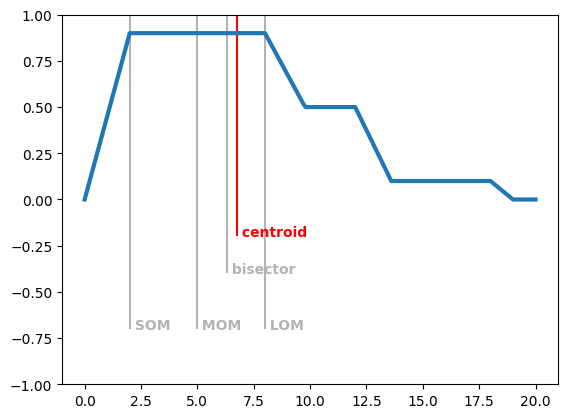

In [5]:
xMOM = fl.defuzz(x, mf, 'mom')
xSOM = fl.defuzz(x, mf, 'som')
xLOM = fl.defuzz(x, mf, 'lom')

gray = [x*0.7 for x in [1, 1, 1]]

plt.vlines(xCentroid, -0.2, 1.2, color='r')
plt.text(xCentroid, -0.2, ' centroid', fontweight='bold', color='r')
plt.vlines(xBisector, -0.4, 1.2, color=gray)
plt.text(xBisector, -0.4, ' bisector', fontweight='bold', color=gray)
plt.vlines(xMOM, -0.7, 1.2, color=gray)
plt.text(xMOM, -0.7, ' MOM', fontweight='bold', color=gray)
plt.vlines(xSOM, -0.7, 1.2, color=gray)
plt.text(xSOM, -0.7, ' SOM', fontweight='bold', color=gray)
plt.vlines(xLOM, -0.7, 1.2, color=gray)
plt.text(xLOM, -0.7, ' LOM', fontweight='bold', color=gray)

plt.plot(x, mf, linewidth=3)
plt.ylim(-1, 1)
plt.show()

## Choosing Defuzzification Method

In general, using the default centroid method is good enough for most applications. Once you have created your initial fuzzy inference system, you can try other defuzzification methods to see if any improve your inference results.

## Reference
[https://www.mathworks.com/help/fuzzy/defuzzification-methods.html](https://www.mathworks.com/help/fuzzy/defuzzification-methods.html)